[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/TailUFPB/Tutorials/blob/main/notebooks/limpeza_process_dados.ipynb)

# **Preparação de dados para Aprendizagem de Máquina**
---

Neste notebook aprensentaremos algumas técnicas utilizadas em conjuntos de dados estruturados a fim de prepará-los para o desenvolvimento de um modelo de aprendizagem de máquina. Com o problema definido, algumas tarefas comuns são:

<br>
  
1. Limpeza de dados
2. Transformação de dados

---
## Objetivo

Treinamento de um modelo de regressão para calcular preço de aluguel.

\
Dados: https://www.kaggle.com/maverickjpa/brazilian-real-estate-to-rent

---

## 0. Preparação do ambiente

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/TailUFPB/DataScience/main/datasets/br_real_state_rent/br_real_state_rent.csv", sep = ";")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (22,75) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Esses são os dados brutos:

In [ ]:
df.head()

,account.licenseNumber,account.name,imvl_type,listing.acceptExchange,listing.address.city,listing.address.confidence,listing.address.country,listing.address.level,listing.address.neighborhood,listing.address.point.lat,listing.address.point.lon,listing.address.point.source,listing.address.precision,listing.address.state,listing.address.street,listing.address.streetNumber,listing.address.zipCode,listing.address.zone,listing.advertiserId,listing.amenities,listing.backyard,listing.barbgrill,listing.bathrooms,listing.bathtub,listing.bedrooms,listing.businessTypeContext,listing.createdAt,listing.description,listing.displayAddressType,listing.externalId,listing.fireplace,listing.floors,listing.furnished,listing.garden,listing.guestpark,listing.gym,listing.hottub,listing.id,listing.isInactive,listing.legacyId,listing.link,listing.listingType,listing.mountainview,listing.parkingSpaces,listing.partyhall,listing.playground,listing.pool,listing.portal,listing.preview,listing.pricingInfo.businessLabel,listing.pricingInfo.businessType,listing.pricingInfo.isRent,listing.pricingInfo.isSale,listing.pricingInfo.monthlyCondoFee,listing.pricingInfo.period,listing.pricingInfo.price,listing.pricingInfo.rentalPrice,listing.pricingInfo.rentalTotalPrice,listing.pricingInfo.salePrice,listing.pricingInfo.yearlyIptu,listing.propertyType,listing.publicationType,listing.sauna,listing.soundproofing,listing.sportcourt,listing.subtitle,listing.suites,listing.tenniscourt,listing.title,listing.totalAreas,listing.unitFloor,listing.unitSubTypes,listing.unitTypes,listing.unitsOnTheFloor,listing.updatedAt,listing.usableAreas,listing.usageTypes,type
0,04268-J-SP,ADI Assessoria e Imóveis Ltda,apartamentos,False,São Paulo,VALID_STREET,BR,STREET,Parada Inglesa,-23.493796,-46.605705,GOOGLE,GEOMETRIC_CENTER,São Paulo,Rua Manajeru,normal,normal,Zona Norte,7bf57a4f-0a40-781d-c7b0-5af8f92bd22d,normal,False,False,1,False,2,RENTAL,2020-06-17T10:12:05.109Z,LINDO APARTAMENTO PARADA INGLESA<br><br>2 DORM...,ALL,2481,False,normal,False,False,False,False,False,2486576702,False,normal,/imovel/aluguel-apartamento-2-quartos-parada-i...,USED,False,normal,False,False,False,ZAP,False,Alugar,RENTAL,True,False,50,mês,1.3,1.3,1.350,normal,50,UNIT,SUPER_PREMIUM,False,False,False,Apartamento para alugar em,normal,False,SãO PAULO - Apartamento Padrão - Parada Inglesa,45,0,normal,APARTMENT,0,2020-07-24T05:06:08.843Z,45,RESIDENTIAL,superPremium
1,00254-J-SC,San Remos Imóveis,apartamentos,False,Florianópolis,VALID_STREET,BR,STREET,Agronômica,-27.576887,-48.54293,GOOGLE,ROOFTOP,Santa Catarina,Avenida Governador Irineu Bornhausen,3440,88025201,Bairros,4facce12-e20d-00a9-e96c-f0fec9d61fb8,KITCHEN_CABINETS|BUILTIN_WARDROBE|BALCONY|SERV...,False,False,3,False,3,RENTAL,2020-07-10T23:40:26.142Z,EXCELENTE LOCALIZAÇÃO - TRANQUILIDADE E COMODI...,ALL,2060,False,normal,False,False,False,False,False,2489060354,False,normal,/imovel/aluguel-apartamento-3-quartos-com-arma...,USED,False,1,False,False,False,ZAP,False,Alugar,RENTAL,True,False,1.961,mês,3.6,3.6,5.561,normal,370,UNIT,SUPER_PREMIUM,False,False,False,Apartamento para alugar em,1,False,Florianópolis - Apartamento Padrão - Agronômica,140,0,normal,APARTMENT,0,2020-07-12T11:43:29.976Z,140,RESIDENTIAL,superPremium
2,48861-F-RJ,Família Bacellar Imobiliária,apartamentos,False,Rio de Janeiro,VALID_STREET,BR,STREET,Recreio Dos Bandeirantes,-23.018798,-43.462056,GOOGLE,GEOMETRIC_CENTER,Rio de Janeiro,Rua Mário Faustino,normal,22795225,Zona Oeste,99a49079-2e53-2611-c44f-d06c291e8276,ELEVATOR|INTERCOM|KITCHEN_CABINETS|BUILTIN_WAR...,False,False,3,False,3,RENTAL,2020-07-23T21:43:24.010Z,Cód: TIAP32493. Para quem quer morar próximo d...,STREET,TIAP32493,False,normal,False,False,False,False,False,2490399573,False,normal,/imovel/aluguel-apartamento-3-quartos-com-elev...,USED,False,2,False,False,False,ZAP,False,Alugar,RENTAL,True,False,835,mês,2.1,2.1,2.935,normal,244,UNIT,SUPER_PREMIUM,False,False,False,Apartamento para alugar em,1,False,Rio de Janeiro - Apartamento

Essa função vai servir para verficar as dimensões dos dados ao longo do pré-processamento, cada linha equivale a um objeto e cada coluna a um atributo:

In [ ]:
def tamanho(df):
    linhas, colunas = df.shape
    print("Objetos:", linhas)
    print("Atributos:", colunas)

In [ ]:
tamanho(df)

Objetos: 35772
Atributos: 78


---

## 1. Limpeza de dados (Pandas)

Renomeando as colunas para nomes mais simples e indicativos:

In [ ]:
names = ["licenca", "empresa", "tipo", "troca", "cidade",	"enderecoConfidencial",	"pais",	"tipoRegiao",	"bairro",	"latitude",	
         "longitude", "busca", "precisaoEndereco", "estado", "rua",	"numeroEndereco",	"cep", "zona", "advertiserId", 
         "comodidades",	"quintal", "churrasqueira", "banheiros", "banheira", "quartos", "aluguelVenda", "cadastro", 
         "descricao",	"exibicaoEndereco", "idExterno", "lareira", "andares", "mobilhado", "jardim",	"estacionamento",	
         "academia", "jacuzzi",	"id",	"inativo", "legacyId", "link", "listingType", "vistaMontanhas", "vagasGaragem",	
         "salaoFestas",	"parquinho", "piscina",	"portal",	"preview", "categoria", "categoriaIngles", "alugado",	"vendido", 
         "taxaCondominio", "periodo", "preco",	"precoAluguel",	"precoTotal",	"precoVenda",	"iptuAnual", "propertyType", 
         "tipoPublicacaoIngles", "sauna",	"isolamentoAcustico",	"quadra",	"legenda", "suites", "quadraTenis", "titulo", 
         "area", "andar", "subtipo", "tipoIngles", "unidadesNoAndar",	"atualizacao", "areaUtilizada", "tipoUso", "tipoPublicacao"]

df.columns = names

### 1.1 Tratamento de valores únicos

Valores únicos são os valores que um atributo apresenta, aqueles que só possuem um não ajudam a diferenciar os dados.
\
Por exemplo: Em "pais" só existe um valor único ("BR"), não seria útil manter esse atributo.
\
Observamos que o dataset possui 5 atributos com um único valor único.


In [ ]:
for item in df:
  print(f"{item}: {df[item].nunique()}")

licenca: 3407
empresa: 4216
tipo: 8
troca: 2
cidade: 331
enderecoConfidencial: 2
pais: 1
tipoRegiao: 5
bairro: 3570
latitude: 14935
longitude: 14927
busca: 5
precisaoEndereco: 5
estado: 25
rua: 8206
numeroEndereco: 2057
cep: 11258
zona: 10
advertiserId: 4244
comodidades: 10037
quintal: 2
churrasqueira: 2
banheiros: 29
banheira: 2
quartos: 12
aluguelVenda: 2
cadastro: 25205
descricao: 23128
exibicaoEndereco: 3
idExterno: 21494
lareira: 2
andares: 36
mobilhado: 2
jardim: 2
estacionamento: 2
academia: 2
jacuzzi: 2
id: 25354
inativo: 2
legacyId: 2744
link: 25354
listingType: 1
vistaMontanhas: 2
vagasGaragem: 23
salaoFestas: 2
parquinho: 2
piscina: 2
portal: 2
preview: 1
categoria: 3
categoriaIngles: 3
alugado: 1
vendido: 2
taxaCondominio: 2105
periodo: 4
preco: 1778
precoAluguel: 1778
precoTotal: 4998
precoVenda: 854
iptuAnual: 1826
propertyType: 1
tipoPublicacaoIngles: 4
sauna: 2
isolamentoAcustico: 2
quadra: 2
legenda: 41
suites: 13
quadraTenis: 2
titulo: 13834
area: 1063
andar: 27
subti

Caso existissem colunas com valores únicos poderiamos dropar com a função abaixo:

In [ ]:
for column in df:
    if df[column].nunique() == 1:
        df.drop(columns=column, inplace=True)

Verificando as dimensões dos dados:

In [ ]:
tamanho(df)

Objetos: 35772
Atributos: 73


### 1.2 Dropar atributos irrelevantes

Atributos que talvez não sejam de grande valia para geração do modelo de ML.
Esse passo foi feito meramente de forma empírica e experimental. Não seguimos nenhum método formal de seleção de atributos (Estudaremos em breve).

In [ ]:
# Checar novamente os novos atributos depois do passo anterior

for item in df:
  print(item)

licenca
empresa
tipo
troca
cidade
enderecoConfidencial
tipoRegiao
bairro
latitude
longitude
busca
precisaoEndereco
estado
rua
numeroEndereco
cep
zona
advertiserId
comodidades
quintal
churrasqueira
banheiros
banheira
quartos
aluguelVenda
cadastro
descricao
exibicaoEndereco
idExterno
lareira
andares
mobilhado
jardim
estacionamento
academia
jacuzzi
id
inativo
legacyId
link
vistaMontanhas
vagasGaragem
salaoFestas
parquinho
piscina
portal
categoria
categoriaIngles
vendido
taxaCondominio
periodo
preco
precoAluguel
precoTotal
precoVenda
iptuAnual
tipoPublicacaoIngles
sauna
isolamentoAcustico
quadra
legenda
suites
quadraTenis
titulo
area
andar
subtipo
tipoIngles
unidadesNoAndar
atualizacao
areaUtilizada
tipoUso
tipoPublicacao


In [ ]:
irrelevantes = ["licenca", "empresa", "tipo", "troca", "enderecoConfidencial", "tipoRegiao", "bairro", "latitude",	
                "longitude", "busca", "precisaoEndereco", "rua", "numeroEndereco", "cep",	"zona", "advertiserId", 
                "comodidades","aluguelVenda", "cadastro", "descricao", "exibicaoEndereco", "idExterno", "id",	"inativo", 
                "legacyId", "link", "portal", "categoria", "categoriaIngles", "vendido", "taxaCondominio", "periodo", 
                "preco",	"precoAluguel", "precoVenda", "iptuAnual", "tipoPublicacaoIngles", "legenda", "titulo", 
                "subtipo", "tipoIngles", "unidadesNoAndar", "atualizacao", "tipoUso", "tipoPublicacao"]

df.drop(columns=irrelevantes, inplace=True)

In [ ]:
df.head()

,cidade,estado,quintal,churrasqueira,banheiros,banheira,quartos,lareira,andares,mobilhado,jardim,estacionamento,academia,jacuzzi,vistaMontanhas,vagasGaragem,salaoFestas,parquinho,piscina,precoTotal,sauna,isolamentoAcustico,quadra,suites,quadraTenis,area,andar,areaUtilizada
0,São Paulo,São Paulo,False,False,1,False,2,False,normal,False,False,False,False,False,False,normal,False,False,False,1.350,False,False,False,normal,False,45,0,45
1,Florianópolis,Santa Catarina,False,False,3,False,3,False,normal,False,False,False,False,False,False,1,False,False,False,5.561,False,False,False,1,False,140,0,140
2,Rio de Janeiro,Rio de Janeiro,False,False,3,False,3,False,normal,False,False,False,False,False,False,2,False,False,False,2.935,False,False,False,1,False,100,0,100
3,Campinas,São Paulo,False,False,2,False,1,False,normal,False,False,False,False,False,False,1,False,False,True,137.437,True,False,False,0,False,80,0,80
4,São Paulo,São Paulo,False,True,3,False,2,False,normal,False,False,False,False,False,False,2,True,True,True,3.136,True,False,True,2,False,69,0,69


Verificando as dimensões dos dados:

In [ ]:
tamanho(df)

Objetos: 35772
Atributos: 28


### 1.3 Tratamento valores duplicados

Vamos verificar a occorrência de objetos duplicados.

In [ ]:
print("Objetos duplicados: %d" % df.duplicated().sum())

Objetos duplicados: 10608


Com essa função vamos apagar os objetos duplicados e manter somente a primeira ocorrência, depois vamos reindexar.

In [ ]:
df.drop_duplicates(keep='first', inplace=True)
df.reset_index(drop=True, inplace=True)

Verificando as dimensões dos dados:

In [ ]:
tamanho(df)

Objetos: 25164
Atributos: 28


### 1.4 Tratamento de dados faltantes / nulos

Percebemos a ocorrência de valores descritos como `normal`.
\
Analisando, percebemos que indicam dados faltantes, vamos corrigir e colocar como sendo valor `NaN`.

In [ ]:
df.replace("normal", np.nan, inplace=True)

In [ ]:
# Transformar dados vazios para NaN
# Não existem valores vazios, mas fica de exemplo

nan_value = float("NaN")
df.replace("", nan_value, inplace=True)

In [ ]:
df.isnull().sum()

cidade                    0
estado                    0
quintal                   0
churrasqueira             0
banheiros                 3
banheira                  0
quartos                   0
lareira                   0
andares               23048
mobilhado                 0
jardim                    0
estacionamento            0
academia                  0
jacuzzi                   0
vistaMontanhas            0
vagasGaragem           1638
salaoFestas               0
parquinho                 0
piscina                   0
precoTotal             6801
sauna                     0
isolamentoAcustico        0
quadra                    0
suites                 4997
quadraTenis               0
area                   1309
andar                     0
areaUtilizada             1
dtype: int64

#### Existem algumas maneiras de lidar com dados faltantes

1. Deletar as colunas com dados faltantes:

  `df.dropna(axis=1, inplace=True)`

2. Deletar os exemplos com dados faltantes:

  `df.dropna(axis=0, inplace=True)`

3. Preencher os dados faltantes com a média dos valores do atributo:

  ```
  from sklearn.preprocessing import Imputer

  imputer = Imputer(missing_values = np.nan, strategy = ‘mean’, axis = 0)

  imputer = imputer.fit(X)

  ```

4. Preencher os dados faltantes com valores quaisquer:

  Preencher com zero 
  
  ```
  df.fillna(0)
  ```
  Preenccher com valor escolhido
  ```
  values = {'coluna_x': valor, 'coluna_y': valor}
  df.fillna(value=values)
  ```

In [ ]:
# Substituímos por 1 a título de exemplo

df.fillna(value=1, inplace=True)

### 1.5 Tratamento de valores Inválidos, Inconsistentes e Outliers

Observar se existem valores numéricos estranhos.
\
Como por exemplo:
\
1 - Número de quartos negativos.
\
2 - Número muito grande de suítes em área pequena.
\
3 - Número muito grande de vagas de garagem.

Esse passo deve ser feito com exploração e atenção máxima.

#### 1.5.1 - Correção de Formato: Um pequeno exemplo

Observamos que temos alguns atributos em forma de `object` e `bool`.
Convém transformá-los para `int64` ou `float`.

\

Essa parte do processamento pode estar mais relacionada com transformação de dados, porém, a título de exemplo iremos mostrar uma mudança do tipo de dado para podermos realizar análise exploratória de valores inválidos/outliers.

In [ ]:
# Observamos os tipos dos dados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25164 entries, 0 to 25163
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   cidade              25164 non-null  object
 1   estado              25164 non-null  object
 2   quintal             25164 non-null  bool  
 3   churrasqueira       25164 non-null  bool  
 4   banheiros           25164 non-null  object
 5   banheira            25164 non-null  bool  
 6   quartos             25164 non-null  int64 
 7   lareira             25164 non-null  bool  
 8   andares             25164 non-null  object
 9   mobilhado           25164 non-null  bool  
 10  jardim              25164 non-null  bool  
 11  estacionamento      25164 non-null  bool  
 12  academia            25164 non-null  bool  
 13  jacuzzi             25164 non-null  bool  
 14  vistaMontanhas      25164 non-null  bool  
 15  vagasGaragem        25164 non-null  object
 16  salaoFestas         25

In [ ]:
# Checando valores que aparecem no atributo suite
# Percebemos que existe um tipo 'normal'

df['suites'].unique()

array([1, '1', '0', '2', '3', '4', '5', '6', '46', '7', '8', '10', '14'],
      dtype=object)

In [ ]:
# Mudar suite para númerico

df['suites'] = df['suites'].astype(int)

In [ ]:
# verificar a distribuição dos valores

df['suites'].describe()

count    25164.000000
mean         1.369735
std          1.292374
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         46.000000
Name: suites, dtype: float64

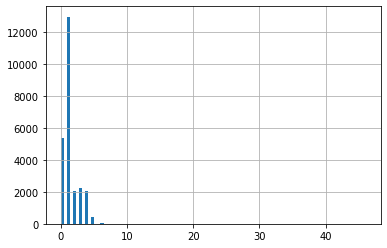

In [ ]:
# Plotar alguns gráficos de atributos "duvidosos"

df['suites'].hist(bins=100)

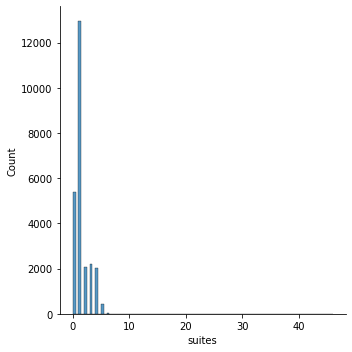

In [ ]:
sns.displot(df['suites'], binwidth=0.5)

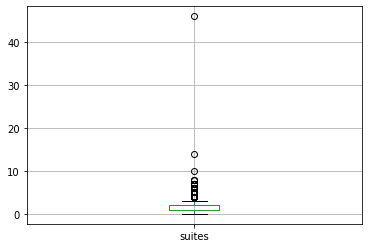

In [ ]:
# Boxplot ajuda na identificação de outliers

df.boxplot(column=['suites'])

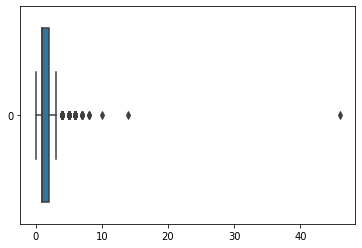

In [ ]:
sns.boxplot(data=df['suites'], orient="h")

In [ ]:
# Percebemos um outlier acima do número 40
# Checar valores únicos de algum atributo

df['suites'].unique()

array([ 1,  0,  2,  3,  4,  5,  6, 46,  7,  8, 10, 14])

In [ ]:
# Checar linha específica de um atributo onde certa condição se satisfaz
# Analisamos que o número 46 de suítes é um outlier
# Existem apenas 4 quartos no imóvel

df.loc[df['suites'] == 46]

,cidade,estado,quintal,churrasqueira,banheiros,banheira,quartos,lareira,andares,mobilhado,jardim,estacionamento,academia,jacuzzi,vistaMontanhas,vagasGaragem,salaoFestas,parquinho,piscina,precoTotal,sauna,isolamentoAcustico,quadra,suites,quadraTenis,area,andar,areaUtilizada
5219,Rio de Janeiro,Rio de Janeiro,False,False,6,False,4,False,1,False,False,False,False,False,False,2,False,False,False,6.350,False,False,False,46,False,280,0,280


Exemplo de como Dropar uma linha onde certa condição se satisfaz

```python
indexNames = df[df['suites'] == 46].index
df.drop(indexNames , inplace=True)
```

Exemplo de como Trocar um valor por outro
```python
df["suites"].replace({46: 4}, inplace=True)
```

In [ ]:
# Trocando o valor

df["suites"].replace({46: 4}, inplace=True)

### 1.7 Separar variável dependente

A variável dependente será a variável que queremos calcular com o modelo de regressão. Retiramos ela do dataset.

In [ ]:
y = pd.DataFrame(df, columns = ['precoTotal'])
df.drop(columns='precoTotal', inplace=True)
Y = y.iloc[:, :].values
df.head()

,cidade,estado,quintal,churrasqueira,banheiros,banheira,quartos,lareira,andares,mobilhado,jardim,estacionamento,academia,jacuzzi,vistaMontanhas,vagasGaragem,salaoFestas,parquinho,piscina,sauna,isolamentoAcustico,quadra,suites,quadraTenis,area,andar,areaUtilizada
0,São Paulo,São Paulo,False,False,1,False,2,False,1,False,False,False,False,False,False,1,False,False,False,False,False,False,1,False,45,0,45
1,Florianópolis,Santa Catarina,False,False,3,False,3,False,1,False,False,False,False,False,False,1,False,False,False,False,False,False,1,False,140,0,140
2,Rio de Janeiro,Rio de Janeiro,False,False,3,False,3,False,1,False,False,False,False,False,False,2,False,False,False,False,False,False,1,False,100,0,100
3,Campinas,São Paulo,False,False,2,False,1,False,1,False,False,False,False,False,False,1,False,False,True,True,False,False,0,False,80,0,80
4,São Paulo,São Paulo,False,True,3,False,2,False,1,False,False,False,False,False,False,2,True,True,True,True,False,True,2,False,69,0,69


### 1.8 Verificação Final

**O que falta fazer:**
\
1 - Transformar o formato dos outros dados
\
2 - Encodar atributos
\
3 - Normalizar
\
4 - Reescalar

In [ ]:
df.head()

,cidade,estado,quintal,churrasqueira,banheiros,banheira,quartos,lareira,andares,mobilhado,jardim,estacionamento,academia,jacuzzi,vistaMontanhas,vagasGaragem,salaoFestas,parquinho,piscina,sauna,isolamentoAcustico,quadra,suites,quadraTenis,area,andar,areaUtilizada
0,São Paulo,São Paulo,False,False,1,False,2,False,1,False,False,False,False,False,False,1,False,False,False,False,False,False,1,False,45,0,45
1,Florianópolis,Santa Catarina,False,False,3,False,3,False,1,False,False,False,False,False,False,1,False,False,False,False,False,False,1,False,140,0,140
2,Rio de Janeiro,Rio de Janeiro,False,False,3,False,3,False,1,False,False,False,False,False,False,2,False,False,False,False,False,False,1,False,100,0,100
3,Campinas,São Paulo,False,False,2,False,1,False,1,False,False,False,False,False,False,1,False,False,True,True,False,False,0,False,80,0,80
4,São Paulo,São Paulo,False,True,3,False,2,False,1,False,False,False,False,False,False,2,True,True,True,True,False,True,2,False,69,0,69


---

## 2. Transformação de dados (Pré-processamento pelo SKLearn)

### 2.1 Corrigir formato dos Dados



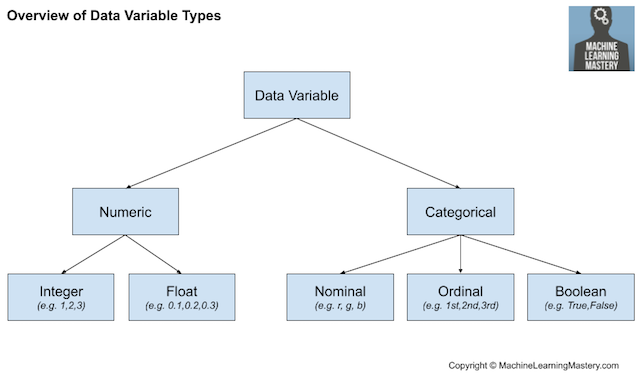


1. Dados numéricos são números que representam alguma informação, podem ser inteiros ou Floats.
    1. Inteiros: Os dados inteiros são utilizados para representar quantidade de filhos, número de quartos, quantidade de pétalas, etc.
    2. Float: Os dados float são números reais que podem representar números com mais casas decimais. Alguns exemplos são peso(72,680kg), distâncias(42,2km), etc.
2. Os dados categóricos podem ser nominais, ordinais ou booleanos.
    1. Nominais: Os dados nominais servem para caracterizar algo sem ter uma ordem definida. Cores ou nomes das cidades são variáveis nominais. 
    2. Ordinais: As variáveis ordinais são categorias que seguem algum tipo de hierarquia. A escolaridade e o grau de satisfação podem ser variáveis categóricas ordinais.
    3. Booleanos: Já os dados booleanos são dados que aceitam apenas 2 possibilidades: verdadeiro ou falso(1 ou 0). Esse tipo de dados pode ser usados em variáveis que tentam identificar a presença ou não de determinada característica.

Substituir Booleanos por inteiros

In [ ]:
df.replace([True,False],[1,0], inplace=True)

Substituir `object` por `int` nas colunas relevantes

In [ ]:
df['banheiros'] = df['banheiros'].astype(int)
df['andares'] = df['andares'].astype(int)
df['vagasGaragem'] = df['vagasGaragem'].astype(int)
df['area'] = pd.to_numeric(df['area'])
df['areaUtilizada'] = pd.to_numeric(df['areaUtilizada'])

TODO: COLOCAR UM TEXTO AQUI SOBRE A CHECAGEM DAS OPERAÇÕES ANTERIORES

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25164 entries, 0 to 25163
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   cidade              25164 non-null  object
 1   estado              25164 non-null  object
 2   quintal             25164 non-null  int64 
 3   churrasqueira       25164 non-null  int64 
 4   banheiros           25164 non-null  int64 
 5   banheira            25164 non-null  int64 
 6   quartos             25164 non-null  int64 
 7   lareira             25164 non-null  int64 
 8   andares             25164 non-null  int64 
 9   mobilhado           25164 non-null  int64 
 10  jardim              25164 non-null  int64 
 11  estacionamento      25164 non-null  int64 
 12  academia            25164 non-null  int64 
 13  jacuzzi             25164 non-null  int64 
 14  vistaMontanhas      25164 non-null  int64 
 15  vagasGaragem        25164 non-null  int64 
 16  salaoFestas         25

Observar que deixamos `cidade` e `estado` para serem "encodadas" mais adiante pelo método `
sklearn.preprocessing.LabelEncoder`.

### 2.2 Encodar variáveis categóricas


Criar novo df encodando os atributos "cidade" e "estado" em números. 


In [ ]:
new_df = df.copy()
new_df.head(3)

,cidade,estado,quintal,churrasqueira,banheiros,banheira,quartos,lareira,andares,mobilhado,jardim,estacionamento,academia,jacuzzi,vistaMontanhas,vagasGaragem,salaoFestas,parquinho,piscina,sauna,isolamentoAcustico,quadra,suites,quadraTenis,area,andar,areaUtilizada
0,São Paulo,São Paulo,0,0,1,0,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,45,0,45
1,Florianópolis,Santa Catarina,0,0,3,0,3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,140,0,140
2,Rio de Janeiro,Rio de Janeiro,0,0,3,0,3,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,100,0,100


Ao fazer as transformações nos dados, precisamos atentar aos tipos de dados:

In [ ]:
from sklearn.preprocessing import LabelEncoder 

categorical_features = ['cidade', 'estado']

enc = LabelEncoder()

for column in categorical_features:
    new_df[column] = new_df[column].astype('category')
    new_df[column] = enc.fit_transform(new_df[column])
    

In [ ]:
new_df.head(3)

,cidade,estado,quintal,churrasqueira,banheiros,banheira,quartos,lareira,andares,mobilhado,jardim,estacionamento,academia,jacuzzi,vistaMontanhas,vagasGaragem,salaoFestas,parquinho,piscina,sauna,isolamentoAcustico,quadra,suites,quadraTenis,area,andar,areaUtilizada
0,290,23,0,0,1,0,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,45,0,45
1,102,21,0,0,3,0,3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,140,0,140
2,246,19,0,0,3,0,3,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,100,0,100


Perceba que transformamos o nome das cidades e dos estados em variáveis numéricas com o label encoder. Ou seja, tentamos transformar uma variável categórica nominal para uma variável numérica inteira.
Será que isso realmente faz sentido? Ao tentar treinar um modelo com esses dados, estaremos informando ao algoritmo que os atributos cidade e estado contém dados que seguem algum tipo de ordem, e isso não é verdade.
Precisamos ter muito cuidado com os tipos de dados antes de transformar eles, para que esse tipo de coisa não ocorra.

Nesse caso é mais viável encodar as variáveis de estado utilizando o OneHotEncoder, criando um atributo booleano para cada estado.

In [ ]:
from sklearn.preprocessing import OneHotEncoder 

new_df = df.copy()
enc = OneHotEncoder()
X = df[['estado']]
enc.fit(X)
estados = pd.DataFrame(enc.transform(df[['estado']]).toarray())
newdfnomes = new_df.columns.values
estadosnomes = enc.categories_
new_df = pd.concat([new_df, estados], axis=1)
new_df.columns = newdfnomes.tolist() + estadosnomes[0].tolist()

new_df.drop(['cidade', 'estado'], axis='columns', inplace=True)
new_df.head(3)

,quintal,churrasqueira,banheiros,banheira,quartos,lareira,andares,mobilhado,jardim,estacionamento,academia,jacuzzi,vistaMontanhas,vagasGaragem,salaoFestas,parquinho,piscina,sauna,isolamentoAcustico,quadra,suites,quadraTenis,area,andar,areaUtilizada,Acre,Alagoas,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,Mato Grosso,Mato Grosso do Sul,Minas Gerais,Paraná,Paraíba,Pará,Pernambuco,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Santa Catarina,Sergipe,São Paulo,Tocantins
0,0,0,1,0,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,45,0,45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,3,0,3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,140,0,140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,0,3,0,3,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,100,0,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Dessa vez criamos uma coluna para cada estado através do oneHotEncoding, que transforma cada valor da variável nominal em uma nova variável booleana.

### 2.3 Discretização 
Outra transformação de dados possível é a discretização. Nela, vamos transformar um atributo numérico em um atributo categórico ordinal. Nesse exemplo iremos transformar a área dos imóveis em uma categoria(pequeno, médio ou grande). 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f04b095e9b0>,
      dtype=object)

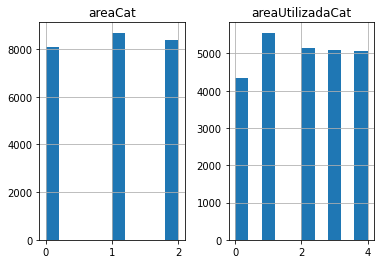

In [ ]:
from sklearn import preprocessing

tamanhos = preprocessing.KBinsDiscretizer(n_bins=[3,5], encode='ordinal').fit(new_df[['area', 'areaUtilizada']])
new_df['areaCat'] = pd.DataFrame(tamanhos.transform(new_df[['area', 'areaUtilizada']]))[0]
new_df['areaUtilizadaCat'] = pd.DataFrame(tamanhos.transform(new_df[['area', 'areaUtilizada']]))[1]
new_df[['areaCat', 'areaUtilizadaCat']].hist()

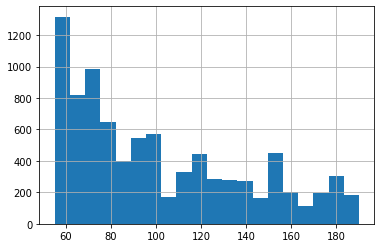

In [ ]:
new_df[new_df['areaCat'] == 1]['area'].hist(bins = 20)

In [ ]:
from scipy import stats

z_scores = stats.zscore(new_df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 1.2).all(axis=1)
new_df = new_df[filtered_entries]

Cada classe descreve aproximadamente um terço dos imóveis. Fazer a discretização pode induzir uma não-linearidade aos modelos outrora lineares.

### 2.4 Standartização
Na standartização nós pegamos um determinado atributo numérico e subtraímos a média dele. Em seguida, dividimos os valores pelo desvio padrão. Com isso, teremos um valor central de 0, e todos os outros são variações de quantos desvios padrão o número está dessa média. 


In [ ]:
new_df.head(5)

,quintal,churrasqueira,banheiros,banheira,quartos,lareira,andares,mobilhado,jardim,estacionamento,academia,jacuzzi,vistaMontanhas,vagasGaragem,salaoFestas,parquinho,piscina,sauna,isolamentoAcustico,quadra,suites,quadraTenis,area,andar,areaUtilizada,Acre,Alagoas,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,Mato Grosso,Mato Grosso do Sul,Minas Gerais,Paraná,Paraíba,Pará,Pernambuco,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Santa Catarina,Sergipe,São Paulo,Tocantins,areaCat,areaUtilizadaCat
8,0,0,2,0,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,70,0,70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0
10,0,0,2,0,3,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,168,0,150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0
15,0,0,2,0,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,80,0,80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0
18,0,0,2,0,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,96,0,96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0
32,0,0,2,0,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,63,0,63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


In [ ]:
new_dfstd = new_df.copy()
new_dfstd = pd.DataFrame(preprocessing.scale(new_dfstd), columns = new_dfstd.columns)
new_dfstd

,quintal,churrasqueira,banheiros,banheira,quartos,lareira,andares,mobilhado,jardim,estacionamento,academia,jacuzzi,vistaMontanhas,vagasGaragem,salaoFestas,parquinho,piscina,sauna,isolamentoAcustico,quadra,suites,quadraTenis,area,andar,areaUtilizada,Acre,Alagoas,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,Mato Grosso,Mato Grosso do Sul,Minas Gerais,Paraná,Paraíba,Pará,Pernambuco,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Santa Catarina,Sergipe,São Paulo,Tocantins,areaCat,areaUtilizadaCat
0,0.0,0.0,0.425054,0.0,-0.238207,0.0,-0.060877,0.0,0.0,0.0,0.0,0.0,0.0,-0.490134,0.0,0.0,0.0,0.0,0.0,0.0,2.344273,0.0,-0.783937,0.0,-0.596108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.087851
1,0.0,0.0,0.425054,0.0,1.269920,0.0,-0.060877,0.0,0.0,0.0,0.0,0.0,0.0,0.820923,0.0,0.0,0.0,0.0,0.0,0.0,0.367053,0.0,1.957935,0.0,1.567725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.603867
2,0.0,0.0,0.425054,0.0,-0.238207,0.0,-0.060877,0.0,0.0,0.0,0.0,0.0,0.0,-0.490134,0.0,0.0,0.0,0.0,0.0,0.0,0.367053,0.0,-0.504154,0.0,-0.325629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.087851
3,0.0,0.0,0.425054,0.0,-0.238207,0.0,-0.060877,0.0,0.0,0.0,0.0,0.0,0.0,-0.490134,0.0,0.0,0.0,0.0,0.0,0.0,0.367053,0.0,-0.056502,0.0,0.107138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.087851
4,0.0,0.0,0.425054,0.0,-0.238207,0.0,-0.060877,0.0,0.0,0.0,0.0,0.0,0.0,-0.490134,0.0,0.0,0.0,0.0,0.0,0.0,0.367053,0.0,-0.979785,0.0,-0.785444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.428165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,0.0,0.0,-0.844250,0.0,1.269920,0.0,-0.060877,0.0,0.0,0.0,0.0,0.0,0.0,-0.490134,0.0,0.0,0.0,0.0,0.0,0.0,0.367053,0.0,1.566239,0.0,0.512856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.087851
1946,0.0,0.0,-0.844250,0.0,-1.746333,0.0,-0.060877,0.0,0.0,0.0,0.0,0.0,0.0,-0.490134,0.0,0.0,0.0,0.0,0.0,0.0,0.367053,0.0,-0.616067,0.0,-0.433821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.087851
1947,0.0,0.0,-0.844250,0.0,-0.238207,0.0,-0.060877,0.0,0.0,0.0,0.0,0.0,0.0,-1.801190,0.0,0.0,0.0,0.0,0.0,0.0,-1.610167,0.0,-1.091698,0.0,-0.893636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.428165
1948,0.0,0.0,-0.844250,0.0,-0.238207,0.0,-0.060877,0.0,0.0,0.0,0.0,0.0,0.0,-0.490134,0.0,0.0,0.0,0.0,0.0,0.0,0.367053,0.0,-1.175633,0.0,-0.974779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.428165


### 2.5 Normalizar Dados

> Bloco com recuo



Normalizar os dados consiste em pegar todos os valores e transformando-os em valores situados entre 0 e 1. Além de ser computacionalmente melhor de trabalhar com números nessa escala, fazer a normalização em vários atributos ajuda a treinar um modelo melhor, para que ele não valorize muito algum atributo apenas porque ele está em uma escala diferente.
No sklearn, o Normalizer se encarrega de fazer essa transformação.


In [ ]:
from sklearn.preprocessing import Normalizer
new_dfnorm = new_df.copy()
new_dfnorm = pd.DataFrame(Normalizer().fit_transform(new_dfnorm), columns = new_dfnorm.columns)
new_dfnorm

,quintal,churrasqueira,banheiros,banheira,quartos,lareira,andares,mobilhado,jardim,estacionamento,academia,jacuzzi,vistaMontanhas,vagasGaragem,salaoFestas,parquinho,piscina,sauna,isolamentoAcustico,quadra,suites,quadraTenis,area,andar,areaUtilizada,Acre,Alagoas,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,Mato Grosso,Mato Grosso do Sul,Minas Gerais,Paraná,Paraíba,Pará,Pernambuco,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Santa Catarina,Sergipe,São Paulo,Tocantins,areaCat,areaUtilizadaCat
0,0.0,0.0,0.020182,0.0,0.020182,0.0,0.010091,0.0,0.0,0.0,0.0,0.0,0.0,0.010091,0.0,0.0,0.0,0.0,0.0,0.0,0.020182,0.0,0.706386,0.0,0.706386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010091,0.0,0.010091,0.020182
1,0.0,0.0,0.008878,0.0,0.013316,0.0,0.004439,0.0,0.0,0.0,0.0,0.0,0.0,0.008878,0.0,0.0,0.0,0.0,0.0,0.0,0.004439,0.0,0.745717,0.0,0.665819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004439,0.0,0.004439,0.013316
2,0.0,0.0,0.017666,0.0,0.017666,0.0,0.008833,0.0,0.0,0.0,0.0,0.0,0.0,0.008833,0.0,0.0,0.0,0.0,0.0,0.0,0.008833,0.0,0.706638,0.0,0.706638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008833,0.0,0.008833,0.017666
3,0.0,0.0,0.014725,0.0,0.014725,0.0,0.007362,0.0,0.0,0.0,0.0,0.0,0.0,0.007362,0.0,0.0,0.0,0.0,0.0,0.0,0.007362,0.0,0.706781,0.0,0.706781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007362,0.0,0.007362,0.014725
4,0.0,0.0,0.022428,0.0,0.022428,0.0,0.011214,0.0,0.0,0.0,0.0,0.0,0.0,0.011214,0.0,0.0,0.0,0.0,0.0,0.0,0.011214,0.0,0.706484,0.0,0.706484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011214,0.0,0.011214,0.011214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,0.0,0.0,0.005266,0.0,0.015799,0.0,0.005266,0.0,0.0,0.0,0.0,0.0,0.0,0.005266,0.0,0.0,0.0,0.0,0.0,0.0,0.005266,0.0,0.811021,0.0,0.584567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005266,0.0,0.005266,0.010533
1946,0.0,0.0,0.009300,0.0,0.009300,0.0,0.009300,0.0,0.0,0.0,0.0,0.0,0.0,0.009300,0.0,0.0,0.0,0.0,0.0,0.0,0.009300,0.0,0.706770,0.0,0.706770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009300,0.0,0.009300,0.018599
1947,0.0,0.0,0.011977,0.0,0.023954,0.0,0.011977,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.706650,0.0,0.706650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011977,0.0,0.011977,0.011977
1948,0.0,0.0,0.012616,0.0,0.025232,0.0,0.012616,0.0,0.0,0.0,0.0,0.0,0.0,0.012616,0.0,0.0,0.0,0.0,0.0,0.0,0.012616,0.0,0.706488,0.0,0.706488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012616,0.0,0.012616,0.012616


### Resultado

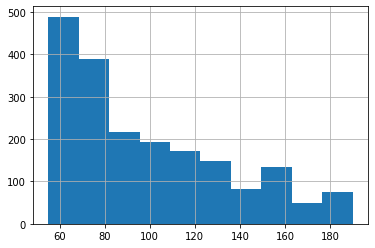

In [ ]:
new_df['area'].hist()

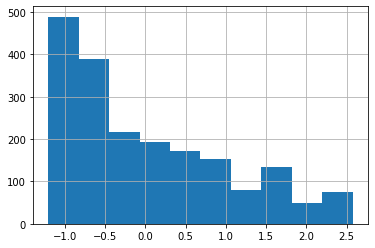

In [ ]:
new_dfstd['area'].hist()

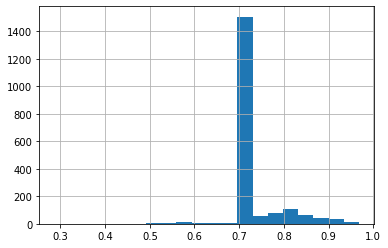

In [ ]:
new_dfnorm['area'].hist(bins = 20)

---

# **Referências**:
* https://machinelearningmastery.com/data-preparation-techniques-for-machine-learning/
* FACELI, Kátia et al. Inteligência artificial: Uma abordagem de aprendizado de máquina. 2011.